In [8]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
import cv2
from skimage import color, io, exposure
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
from skimage.data import camera
from skimage.filters import threshold_otsu, gaussian_filter
matplotlib.rcParams['font.size'] = 9

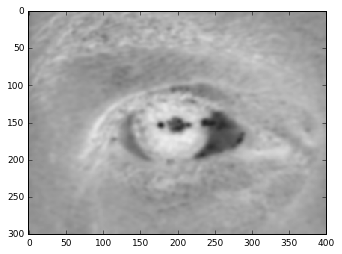

In [20]:
img = io.imread('2.tiff')
gray = color.rgb2gray(img)
hsv = color.rgb2hsv(img)
sat = hsv[:,:,1]
sat = gaussian_filter(sat, 2)
#sat = exposure.equalize_hist(sat)
io.imshow(sat)

### Otsu Thresholding on Saturation Channel of the HSV image

In [18]:
thresh = threshold_otsu(sat)
binary = sat > thresh

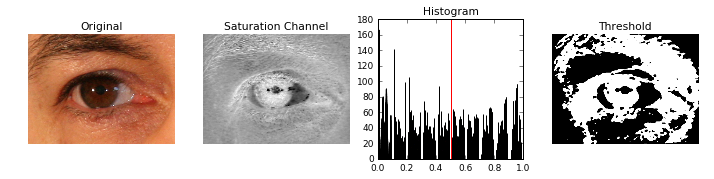

In [19]:
fig1 = plt.figure(figsize=(12, 2.5))
ax1 = plt.subplot(1, 4, 1, adjustable='box-forced')
ax2 = plt.subplot(1, 4, 2, sharex=ax1, sharey=ax1, adjustable='box-forced')
ax3 = plt.subplot(1, 4, 3)
ax4 = plt.subplot(1, 4, 4, sharex=ax1, sharey=ax1, adjustable='box-forced')

ax1.imshow(img)
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(hsv[:,:,1], cmap=plt.cm.gray)
ax2.set_title('Saturation Channel')
ax2.axis('off')

ax3.hist(sat)
ax3.set_title('Histogram')
ax3.axvline(thresh, color='r')

ax4.imshow(binary, cmap=plt.cm.gray)
ax4.set_title('Threshold')
ax4.axis('off')


plt.show()

### Cr - Cb in YCrCb image

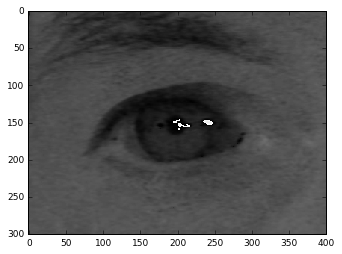

In [32]:
img = io.imread('2.tiff')
imgYCC = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
io.imshow(imgYCC[:,:,1] - imgYCC[:,:,2])

### 2R - G - B in RGB

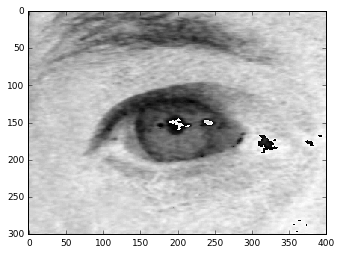

In [34]:
io.imshow(2*img[:,:,0] - img[:,:,1] -img[:,:,2])